# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/UW-MSIS522/master/assignment/data/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [3]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Turja, Miss. Anna Sofia",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [34]:
titanic.isna()
missing = titanic.columns[titanic.isnull().any()]
print(missing)
num_missing = titanic.isnull().sum(axis=0)
print(num_missing)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [35]:
mean1 = titanic['Age'].mean()
age = titanic['Age'].fillna(mean1, inplace=True) 

In [128]:
cabin = titanic['Cabin'].fillna('other', inplace=True)
mode = titanic['Embarked'].mode()
print(mode)
embarked = titanic['Embarked'].fillna('S', inplace=True)
print(titanic.isnull().sum())

0    S
dtype: object
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### **Question 3: What's the name of the person who has the 10th most expensive ticket?**

In [90]:
order = titanic.sort_values('Fare',ascending=False)
order.iloc[9,3]

'Baxter, Mr. Quigg Edmond'

Findings: for this question, when I pull out 'Fare' column in my previous codes, I realize that two people with the same amount of fare are ranked 10th and 11th. Mr. Quigg Edmond is ranked as the 10th by the system so I only list his name. 

### **Question 4: Out of all the people who survived, what's the name of the person who has the 10th most expensive ticket?**

In [91]:
survive = titanic.loc[titanic['Survived'] == 1, :]
survive_sort = survive.sort_values('Fare', ascending=False)
survive_sort.iloc[9,3]

'Endres, Miss. Caroline Louise'

Findings: Like above question, I find out that three people with the same amount of fare are ranked the 10th, 11th and 12th most expensive ticket. Endres, Miss. Caroline Louise is ranked as the 10th by the system.

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [6]:
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
pclass = titanic['Pclass']
gender = titanic['Sex']
display(titanic.pivot_table(
    index = pclass, 
    columns = gender, 
    aggfunc = {'Survived':'mean'}
))

Survived          
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

Findings:
1. For both female and male passengers, the better the class, the higher the survival rate. 96.8% of female passengers from class 1 survived. Only 50% of female passengers from class 3 survived.
2. Survival rates are close for class 2 and 3 male passengers which are low.
3. Overall, survival rates of female passengers is higher than those of male passengers.

# **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

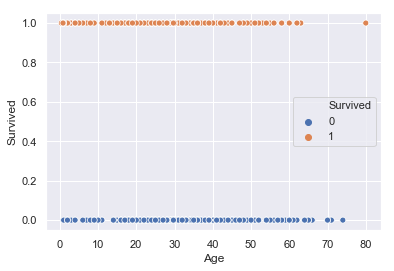

In [75]:
a = titanic.loc[:,['Age','Survived']]
g = sns.scatterplot('Age', 'Survived', data = a, hue='Survived')

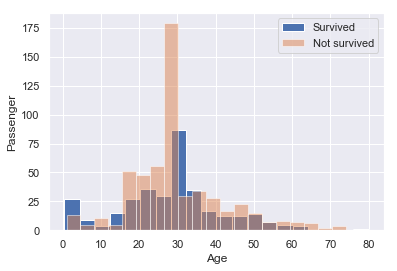

In [78]:
num_bins=20
plt.hist(titanic.loc[titanic['Survived']==1,'Age'],num_bins)
plt.hist(titanic.loc[titanic['Survived']==0,'Age'],num_bins,alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Passenger')

plt.legend(['Survived','Not survived'])

plt.show()

From above graphs, age is not an important factor to passengers' survival. There are people with different ages who survived and not survived. Passengers with ages around 28 have a higher rate of not survival than other ages. 

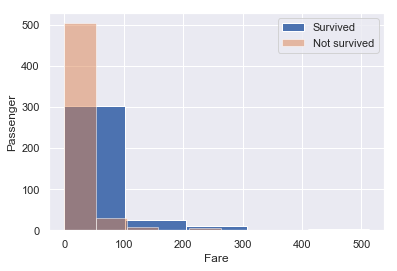

In [97]:
num_bins=5
plt.hist(titanic.loc[titanic['Survived']==1,'Fare'],num_bins)
plt.hist(titanic.loc[titanic['Survived']==0,'Fare'],num_bins,alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Passenger')

plt.legend(['Survived','Not survived'])

plt.show()

C:\Users\wangz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\wangz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\wangz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


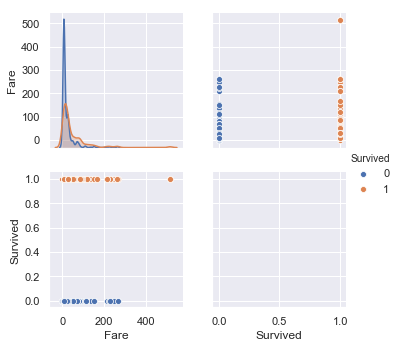

In [81]:
b = titanic.loc[:,['Fare','Survived']]
g = sns.pairplot(b, hue='Survived')

From above graphs, fare is a relatively important factor to passengers' survival. Passengers with fare between $50-$200 have higher chances to survive. Passengers with fare between $0-$50 have higher chances of not survive.

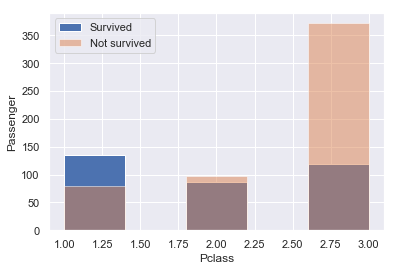

In [98]:
num_bins=5
plt.hist(titanic.loc[titanic['Survived']==1,'Pclass'],num_bins)
plt.hist(titanic.loc[titanic['Survived']==0,'Pclass'],num_bins,alpha=0.5)
plt.xlabel('Pclass')
plt.ylabel('Passenger')

plt.legend(['Survived','Not survived'])

plt.show()

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [126]:
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,other,S


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

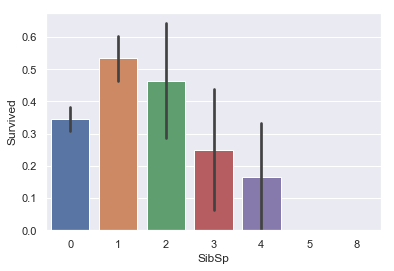

In [139]:
survival_sibsp= titanic.groupby(['SibSp'])['Survived'].mean()
display(survival_sibsp)

sibsp = sns.barplot(x='SibSp', y='Survived', data=titanic)
display(sibsp)

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

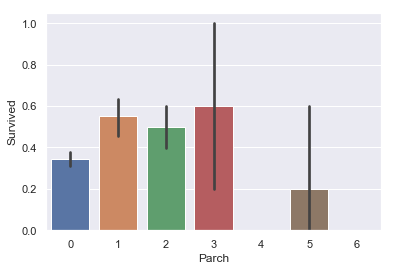

In [137]:
survival_parch= titanic.groupby(['Parch'])['Survived'].mean()
display(survival_parch)

parch = sns.barplot(x='Parch', y='Survived', data=titanic)
display(parch)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [142]:
corr = titanic[['Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived']].apply(lambda x: pd.factorize(x)[0]).corr()
# I exclude passengerID in this question because I think this variable is not correlated to the target value.
display(corr)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Pclass,1.000000,0.018305,0.118133,0.171190,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168091,0.247845
Name,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467,-0.005007
Sex,0.118133,-0.042939,1.000000,0.005005,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.116569,0.543351
Age,0.171190,0.123648,0.005005,1.000000,0.010067,0.132659,0.074814,0.117313,0.163002,-0.133308,0.037025
SibSp,-0.149630,-0.031023,-0.046152,0.010067,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030683,-0.136302
Parch,-0.000343,0.001206,0.242417,0.132659,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.085059,0.086210
Ticket,0.020431,0.760875,-0.132709,0.074814,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.024655,-0.047298
Fare,0.079498,0.299982,0.137725,0.117313,-0.046556,0.074306,0.303257,1.000000,0.379659,0.076726,0.191981
Cabin,0.187437,0.241918,0.082104,0.163002,-0.108709,-0.002761,0.212438,0.379659,1.000000,0.017685,0.270495
Embarked,-0.168091,-0.030467,0.116569,-0.133308,-0.030683,-0.085059,-0.024655,0.076726,0.017685,1.000000,0.106811


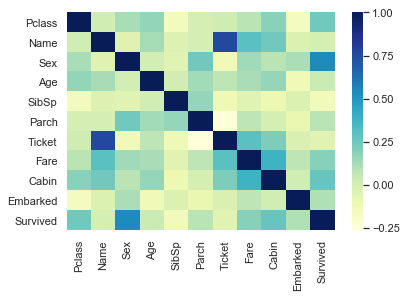

In [143]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index, cmap='YlGnBu')

Findings: 
1. In the prediction of the target variable "Survived", "Sex" has a high correlation with our target variable. This conforms that my findings in the survival rate question using pivot table. Female passengers have higher survival rates than male passengers.
2. Pclass and Cabin have median positive correlation with "Survivied". Not as strong as gender, but they can still be factors.
3. Sibsp have a negative correlation with "Survived". Passengers with more siblings or spouses are unlikely to survive.
4. Cabin and Fare have a high correlation with each other.

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

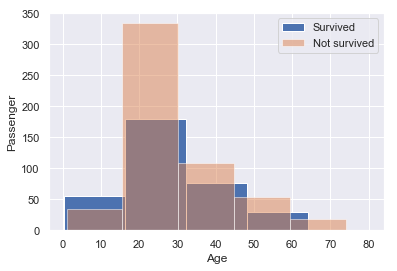

In [145]:
num_bins=5
plt.hist(titanic.loc[titanic['Survived']==1,'Age'],num_bins)
plt.hist(titanic.loc[titanic['Survived']==0,'Age'],num_bins,alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Passenger')

plt.legend(['Survived','Not survived'])

plt.show()

Findings: Age between 20 and 30 has a largest portion in the passenger group. They have the highest survival amount and the highest nonsurvival amount. Passengers with age above 65ish are more unlikely to survive. 

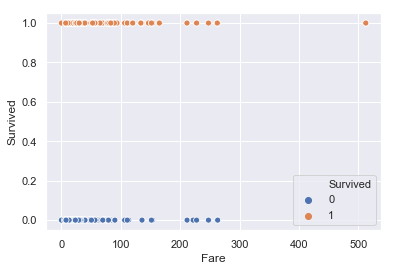

In [163]:
f = titanic.loc[:,['Fare','Survived']]
p = titanic.loc[:,['Pclass']]
g = sns.scatterplot('Fare', 'Survived', data = f,  hue='Survived')

In [ ]:
Findings: Fare is not an important factor of survival. But passengers with low fare between 0-$100 have less chance to survive.

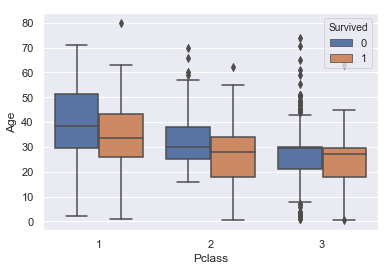

In [165]:
pa = titanic.loc[:,['Pclass','Age']]
s = titanic.loc[:,'Survived']
sns.boxplot(x="Pclass", y="Age", data=pa, hue=s)

In [ ]:
Findings: Class 1 passengers have a higher average age than class 2 and 3 passengers. For every class, the survived passengers
have lower average ages. Outliers for class 3 are a lot. 

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/UW-MSIS522/master/assignment/data/titanic_test.csv)? How is your model accuracy?

In [166]:
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,other,S


In [5]:
#According to the above data visualization and preparation, I choose the following variables to train my model.
mymodel=titanic.drop(['Name','PassengerId','Age','Ticket','Cabin','Embarked'],axis=1)
#replace gender with 0/1, 
mymodel['Sex'].replace(['female','male'],[0,1],inplace=True)

#normalization
mymodel['Fare'] = (mymodel['Fare']-mymodel['Fare'].min()) /(mymodel['Fare'].max()-mymodel['Fare'].min())
#display(model)
mymodel_X = mymodel.drop(['Survived'],axis=1)
mymodel_y = mymodel['Survived']

In [6]:
from sklearn.model_selection import train_test_split
#split training & validation set
X_train, X_val, y_train, y_val = train_test_split(mymodel_X, mymodel_y, test_size=0.3, random_state=42) 
#X_train, X_val, y_train, y_val

In [7]:
from sklearn.linear_model import LogisticRegression 
lr_model = LogisticRegression()
# fit training set
lr_model.fit(X_train, y_train) 
# intercept & coefficient
np.set_printoptions(precision=4,suppress=True)
print ('intercept: {}'.format('%.4f' % lr_model.intercept_)) 
print('coefficient: {} '.format(lr_model.coef_))

intercept: 2.5332
coefficient: [[-0.6668 -2.4225 -0.201  -0.0505  1.0306]] 


In [8]:
#calculate accuracy
print('accuracy of training set：\n',lr_model.score(X_train, y_train)) 
print('accuracy of validation set：\n',lr_model.score(X_val, y_val))

accuracy of training set：
 0.7993579454253612
accuracy of validation set：
 0.8097014925373134
